In [1]:
import pandas as pd
import numpy as np
import sklearn
import os
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from joblib import Memory
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import scatter

In [3]:
wine = load_wine()
features, target = wine.data, wine.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(features, target)

In [5]:
scaler = StandardScaler().fit(X_train)
X_test_std = scaler.transform(X_test)
X_train_std = scaler.transform(X_train)

In [6]:
dummy_clf = DummyClassifier()

In [7]:
dummy_clf.fit(X_test_std, y_test)
print(f"dummy TEST score: {dummy_clf.score(X_test_std, y_test)}")

dummy TEST score: 0.4222222222222222


In [8]:
dummy_clf.fit(X_train_std, y_train)
print(f"dummy TRAIN score: {dummy_clf.score(X_train_std, y_train)}")

dummy TRAIN score: 0.43609022556390975


In [9]:
k_test = {}
k_train = {}

In [10]:
for i in range(1, 21):
    kneighbor_clf = KNeighborsClassifier(n_neighbors=i)
    kneighbor_clf.fit(X_test_std, y_test)
    k_test[i] = kneighbor_clf.score(X_test_std, y_test)
    kneighbor_clf.fit(X_train_std, y_train)
    k_train[i] = kneighbor_clf.score(X_train_std, y_train)

In [11]:
for key, value in k_test.items():
    print(f"Kneighbor TEST score for {key} neighbors: {value}")

Kneighbor TEST score for 1 neighbors: 1.0
Kneighbor TEST score for 2 neighbors: 0.9111111111111111
Kneighbor TEST score for 3 neighbors: 0.9555555555555556
Kneighbor TEST score for 4 neighbors: 0.9333333333333333
Kneighbor TEST score for 5 neighbors: 0.9333333333333333
Kneighbor TEST score for 6 neighbors: 0.9111111111111111
Kneighbor TEST score for 7 neighbors: 0.8888888888888888
Kneighbor TEST score for 8 neighbors: 0.9555555555555556
Kneighbor TEST score for 9 neighbors: 0.9111111111111111
Kneighbor TEST score for 10 neighbors: 0.8888888888888888
Kneighbor TEST score for 11 neighbors: 0.8666666666666667
Kneighbor TEST score for 12 neighbors: 0.8666666666666667
Kneighbor TEST score for 13 neighbors: 0.8888888888888888
Kneighbor TEST score for 14 neighbors: 0.8888888888888888
Kneighbor TEST score for 15 neighbors: 0.8666666666666667
Kneighbor TEST score for 16 neighbors: 0.8666666666666667
Kneighbor TEST score for 17 neighbors: 0.8444444444444444
Kneighbor TEST score for 18 neighbors:

In [12]:
for key, value in k_train.items():
    print(f"Kneighbor TRAIN score for {key} neighbors: {value}")

Kneighbor TRAIN score for 1 neighbors: 1.0
Kneighbor TRAIN score for 2 neighbors: 0.9699248120300752
Kneighbor TRAIN score for 3 neighbors: 0.9624060150375939
Kneighbor TRAIN score for 4 neighbors: 0.9699248120300752
Kneighbor TRAIN score for 5 neighbors: 0.9624060150375939
Kneighbor TRAIN score for 6 neighbors: 0.9548872180451128
Kneighbor TRAIN score for 7 neighbors: 0.9699248120300752
Kneighbor TRAIN score for 8 neighbors: 0.9774436090225563
Kneighbor TRAIN score for 9 neighbors: 0.9699248120300752
Kneighbor TRAIN score for 10 neighbors: 0.9699248120300752
Kneighbor TRAIN score for 11 neighbors: 0.9774436090225563
Kneighbor TRAIN score for 12 neighbors: 0.9624060150375939
Kneighbor TRAIN score for 13 neighbors: 0.9699248120300752
Kneighbor TRAIN score for 14 neighbors: 0.9699248120300752
Kneighbor TRAIN score for 15 neighbors: 0.9699248120300752
Kneighbor TRAIN score for 16 neighbors: 0.9699248120300752
Kneighbor TRAIN score for 17 neighbors: 0.9699248120300752
Kneighbor TRAIN score

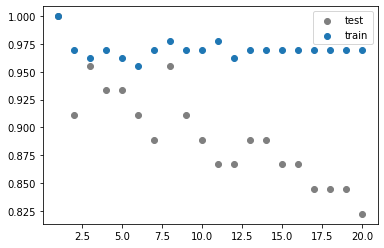

In [13]:
x, y = k_test.keys(), k_test.values()
x1, y1 = k_train.keys(), k_train.values()
scatter(x, y, c="#7f7f7f")
scatter(x1, y1)
plt.legend(['test', 'train'])
plt.show()